# Sep gaban-th, 2021

**Motivation**: This has the most succesfull registration of Nissl to Yale N162 0.1 mm <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import Allen
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
%%time
mice = Mice(Config(512, 4, 100), load_allen=True, load_parcel=True, load_preproc=True)

CPU times: user 3.76 s, sys: 791 ms, total: 4.55 s
Wall time: 6.03 s


[PROGRESS] fit columnar: initiated

[PROGRESS] downsample: done

Warning! missing regions:
'[1596, 1597, 3629, 3644, 3645, 3656, 4079]'

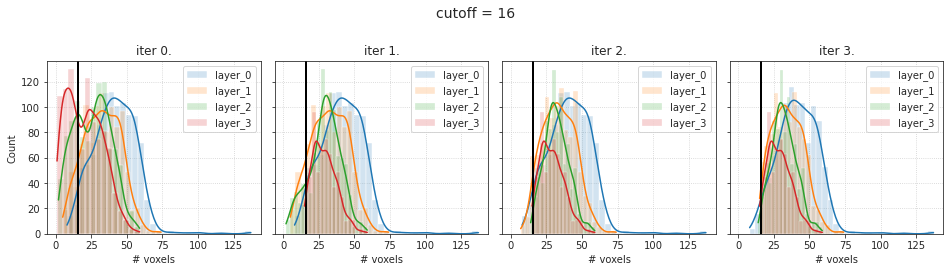

[PROGRESS] merge: done

Warning, region '305' is flat

Warning, region '389' is flat

Warning, region '391' is flat

Warning, region '410' is flat

[PROGRESS] erode: done

num merged regions,     left: 1740,  right: 1740
region id diff,         r - l:  Counter({2048: 1740})

[PROGRESS] fit columnar: done

[PROGRESS] 'parcel_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*4

[PROGRESS] save results: done.

CPU times: user 5min 11s, sys: 23 s, total: 5min 34s
Wall time: 1min 44s


In [3]:
%%time
mice.parcel.fit_parcel(force_fit=True, cutoff=2)

In [4]:
from register.register import *
reg = Register(mice)

In [5]:
kwargs = {
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.20, 0.25, 0.3, 0.35, 0.40],
    'syn_bins': [32, 16],
    'aff_bins': [13, 20],
    'aff_rates': [0.2, 0.8],
    'mi_q': 0.5,
    'n_seeds': 10,
}
kwargs

{
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.2, 0.25, 0.3, 0.35, 0.4],
    'syn_bins': [32, 16],
    'aff_bins': [13, 20],
    'aff_rates': [0.2, 0.8],
    'mi_q': 0.5,
    'n_seeds': 10
}

 bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


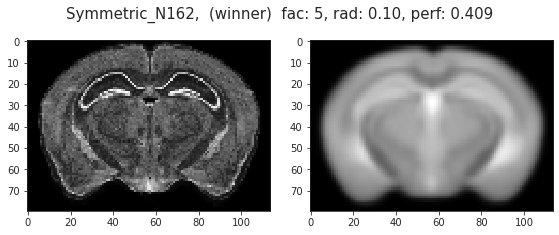

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_06).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/Symmetric_N162

Symmetric_N162, perf:
seed               4
type             SyN
grad            0.25
syn_bin           16
aff_bin           13
aff_rate         0.2
metric           sym
score       0.988916

registering anat sub-SLC01_ses-1:   0%|                                       | 0/30 [00:00<?, ?it/s]

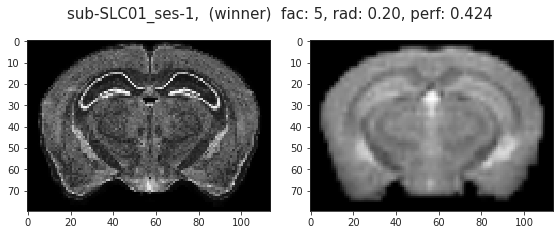

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_07).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC01_ses-1

sub-SLC01_ses-1, perf:
seed              6
type            SyN
grad           0.35
syn_bin          32
aff_bin          13
aff_rate        0.2
metric          sym
score       0.97362

registering anat sub-SLC01_ses-2:   3%|▊                       | 1/30 [2:00:17<58:08:30, 7217.61s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


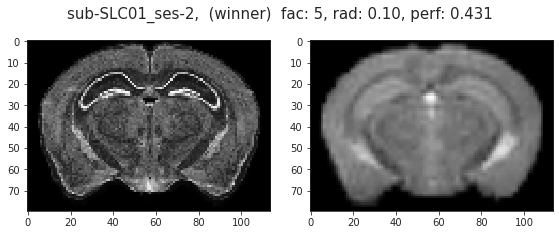

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_07).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC01_ses-2

sub-SLC01_ses-2, perf:
seed               0
type             SyN
grad            0.35
syn_bin           32
aff_bin           20
aff_rate         0.8
metric           sym
score       0.968605

registering anat sub-SLC01_ses-3:   7%|█▌                      | 2/30 [3:55:32<54:45:05, 7039.50s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


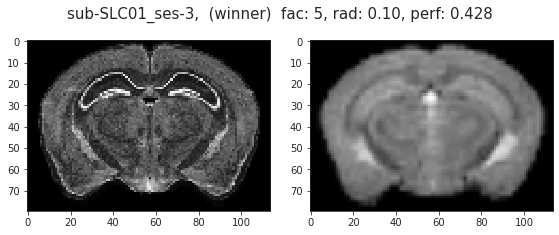

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_07).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC01_ses-3

sub-SLC01_ses-3, perf:
seed               0
type             SyN
grad             0.2
syn_bin           32
aff_bin           20
aff_rate         0.2
metric           sym
score       0.980961

registering anat sub-SLC02_ses-1:  10%|██▍                     | 3/30 [5:53:17<52:52:58, 7051.05s/it]

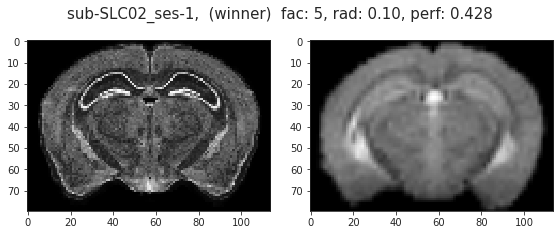

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_07).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC02_ses-1

sub-SLC02_ses-1, perf:
seed               0
type             SyN
grad             0.4
syn_bin           32
aff_bin           20
aff_rate         0.8
metric           sym
score       0.953861

registering anat sub-SLC02_ses-2:  13%|███▏                    | 4/30 [7:46:25<50:10:33, 6947.46s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


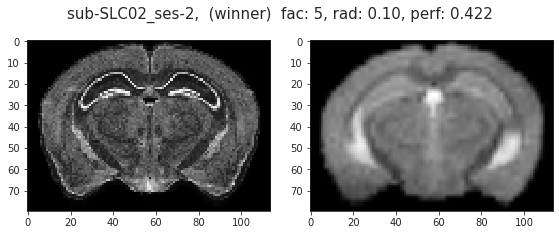

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_07).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC02_ses-2

sub-SLC02_ses-2, perf:
seed               6
type             SyN
grad             0.4
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.942272

registering anat sub-SLC02_ses-3:  17%|████                    | 5/30 [9:41:55<48:12:02, 6940.92s/it]

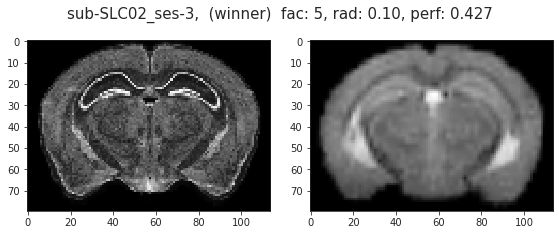

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_07).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC02_ses-3

sub-SLC02_ses-3, perf:
seed               1
type             SyN
grad            0.35
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.950356

registering anat sub-SLC03_ses-1:  20%|████▌                  | 6/30 [11:36:34<46:08:02, 6920.12s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


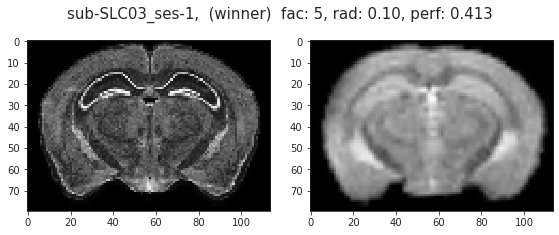

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_07).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC03_ses-1

sub-SLC03_ses-1, perf:
seed               6
type             SyN
grad             0.2
syn_bin           16
aff_bin           13
aff_rate         0.2
metric           sym
score       0.969798

registering anat sub-SLC03_ses-2:  23%|█████▎                 | 7/30 [13:31:59<44:13:15, 6921.55s/it]

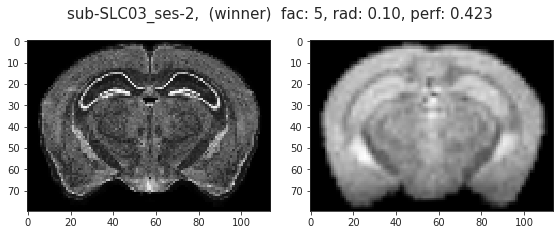

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_07).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC03_ses-2

sub-SLC03_ses-2, perf:
seed               6
type             SyN
grad            0.25
syn_bin           16
aff_bin           13
aff_rate         0.2
metric           sym
score       0.968113

registering anat sub-SLC03_ses-3:  27%|██████▏                | 8/30 [15:28:39<42:27:03, 6946.52s/it]

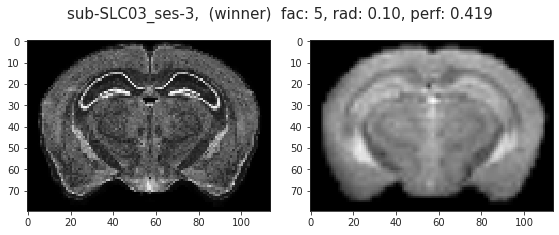

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_07).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC03_ses-3

sub-SLC03_ses-3, perf:
seed               0
type             SyN
grad            0.35
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.964312

registering anat sub-SLC04_ses-1:  30%|██████▉                | 9/30 [17:25:16<40:36:45, 6962.17s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


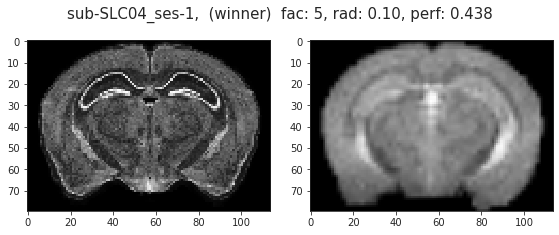

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_07).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC04_ses-1

sub-SLC04_ses-1, perf:
seed               7
type             SyN
grad             0.4
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.962621

registering anat sub-SLC04_ses-2:  33%|███████▎              | 10/30 [19:23:56<38:56:58, 7010.92s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


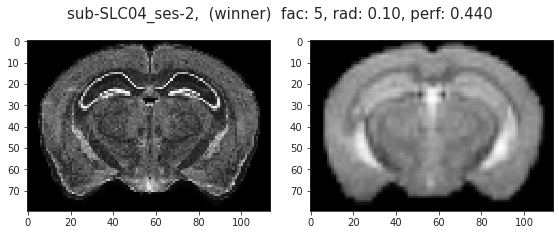

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_07).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC04_ses-2

sub-SLC04_ses-2, perf:
seed               7
type             SyN
grad            0.35
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.974211

registering anat sub-SLC04_ses-3:  37%|████████              | 11/30 [21:20:32<36:58:44, 7006.57s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


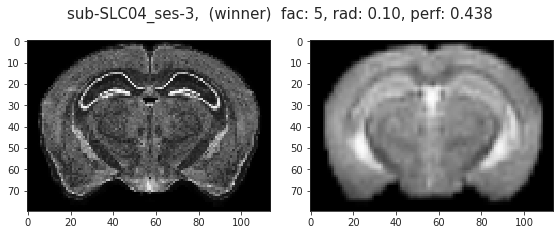

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_07).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC04_ses-3

sub-SLC04_ses-3, perf:
seed               0
type             SyN
grad            0.35
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.966864

registering anat sub-SLC05_ses-1:  40%|████████▊             | 12/30 [23:19:39<35:14:47, 7049.29s/it]

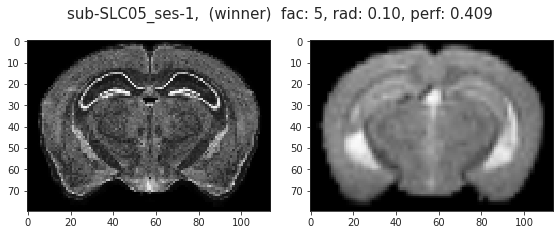

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_08).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC05_ses-1

sub-SLC05_ses-1, perf:
seed               5
type             SyN
grad            0.35
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.978915

registering anat sub-SLC05_ses-2:  43%|█████████▌            | 13/30 [25:16:29<33:13:53, 7037.24s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


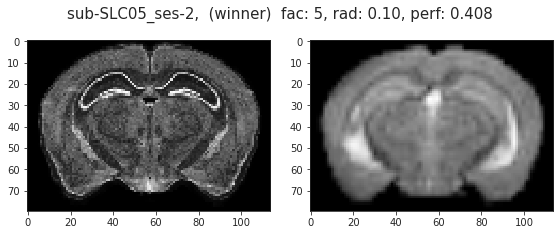

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_08).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC05_ses-2

sub-SLC05_ses-2, perf:
seed               7
type             SyN
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.971989

registering anat sub-SLC05_ses-3:  47%|██████████▎           | 14/30 [27:13:17<31:14:15, 7028.44s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


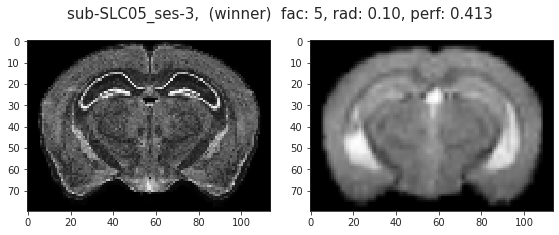

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_08).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC05_ses-3

sub-SLC05_ses-3, perf:
seed               3
type             SyN
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.980593

registering anat sub-SLC06_ses-1:  50%|███████████           | 15/30 [29:10:33<29:17:43, 7030.89s/it]

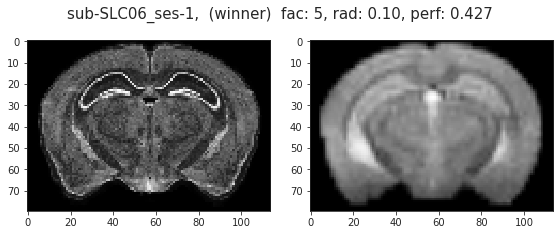

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_08).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC06_ses-1

sub-SLC06_ses-1, perf:
seed               0
type             SyN
grad             0.3
syn_bin           32
aff_bin           20
aff_rate         0.2
metric           sym
score       0.947671

registering anat sub-SLC06_ses-2:  53%|███████████▋          | 16/30 [31:06:54<27:17:00, 7015.74s/it]

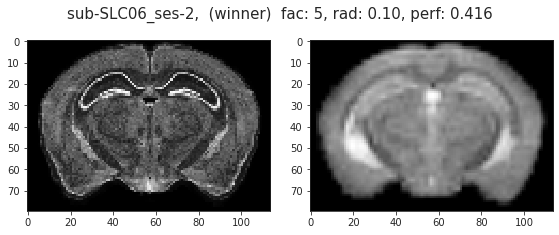

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_08).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC06_ses-2

sub-SLC06_ses-2, perf:
seed               2
type             SyN
grad            0.35
syn_bin           16
aff_bin           13
aff_rate         0.8
metric           sym
score       0.955603

registering anat sub-SLC06_ses-3:  57%|████████████▍         | 17/30 [33:03:52<25:20:14, 7016.52s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


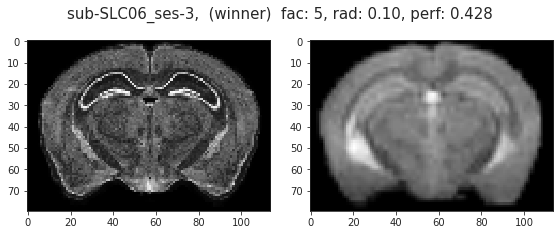

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_08).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC06_ses-3

sub-SLC06_ses-3, perf:
seed               4
type             SyN
grad             0.4
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.959844

registering anat sub-SLC07_ses-1:  60%|█████████████▏        | 18/30 [35:02:30<23:29:24, 7047.04s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


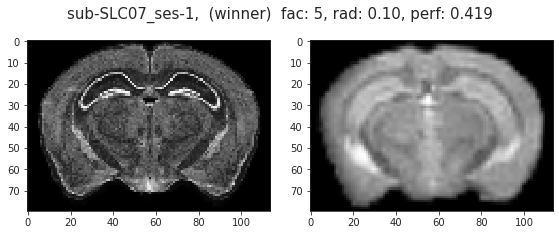

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_08).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC07_ses-1

sub-SLC07_ses-1, perf:
seed               3
type             SyN
grad            0.35
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.954283

registering anat sub-SLC07_ses-2:  63%|█████████████▉        | 19/30 [36:58:32<21:27:14, 7021.33s/it]

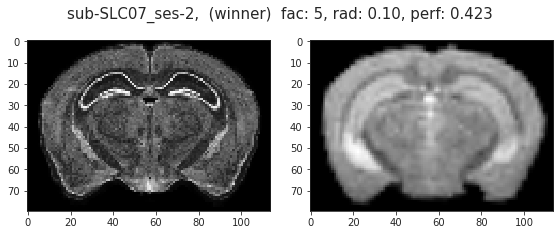

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_08).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC07_ses-2

sub-SLC07_ses-2, perf:
seed               7
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.951587

registering anat sub-SLC07_ses-3:  67%|██████████████▋       | 20/30 [38:56:16<19:32:21, 7034.13s/it]

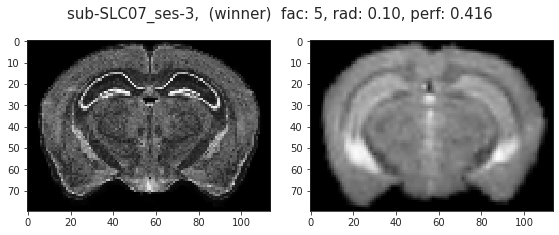

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_08).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC07_ses-3

sub-SLC07_ses-3, perf:
seed               5
type             SyN
grad             0.4
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.960158

registering anat sub-SLC08_ses-1:  70%|███████████████▍      | 21/30 [40:55:21<17:40:06, 7067.43s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


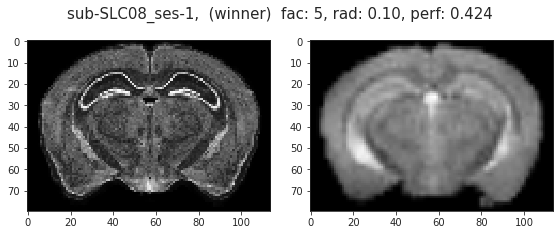

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_08).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC08_ses-1

sub-SLC08_ses-1, perf:
seed               4
type             SyN
grad             0.4
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.944957

registering anat sub-SLC08_ses-2:  73%|████████████████▏     | 22/30 [42:51:35<15:38:36, 7039.55s/it]

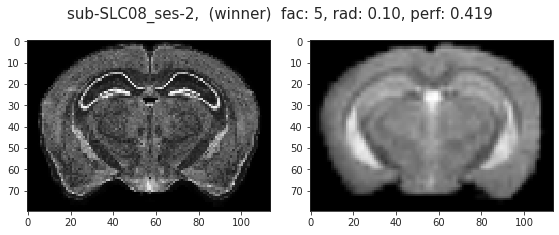

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_08).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC08_ses-2

sub-SLC08_ses-2, perf:
seed             3
type           SyN
grad           0.4
syn_bin         32
aff_bin         13
aff_rate       0.2
metric         sym
score       0.9581

registering anat sub-SLC08_ses-3:  77%|████████████████▊     | 23/30 [44:50:32<13:44:41, 7068.79s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


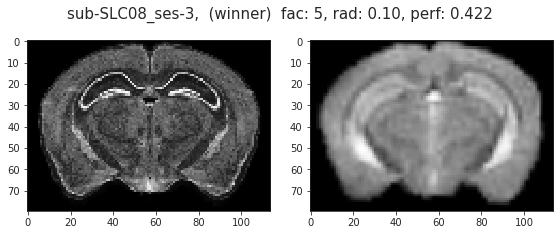

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_08).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC08_ses-3

sub-SLC08_ses-3, perf:
seed                 0
type        ElasticSyN
grad              0.35
syn_bin             32
aff_bin             20
aff_rate           0.8
metric             sym
score         0.963329

registering anat sub-SLC09_ses-1:  80%|█████████████████▌    | 24/30 [46:50:27<11:50:38, 7106.47s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


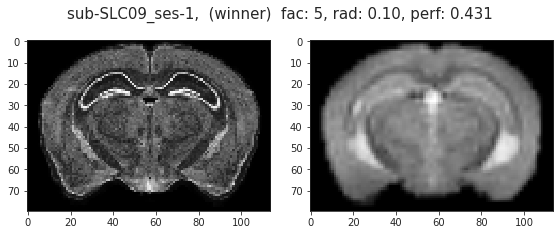

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_09).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC09_ses-1

sub-SLC09_ses-1, perf:
seed               4
type             SyN
grad            0.35
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.990606

registering anat sub-SLC09_ses-2:  83%|███████████████████▏   | 25/30 [48:42:21<9:42:23, 6988.71s/it]

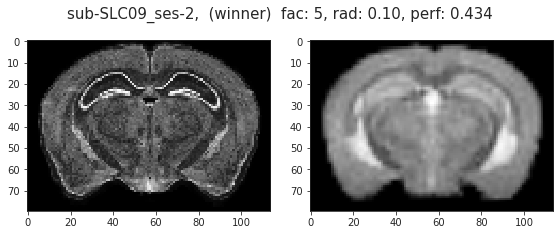

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_09).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC09_ses-2

sub-SLC09_ses-2, perf:
seed               9
type             SyN
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.985174

registering anat sub-SLC09_ses-3:  87%|███████████████████▉   | 26/30 [50:40:24<7:47:48, 7017.14s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


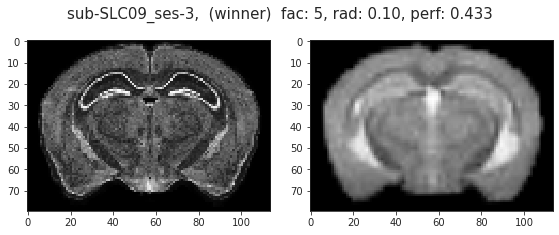

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_09).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC09_ses-3

sub-SLC09_ses-3, perf:
seed               0
type             SyN
grad             0.4
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.983974

registering anat sub-SLC10_ses-1:  90%|████████████████████▋  | 27/30 [52:39:52<5:53:06, 7062.27s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


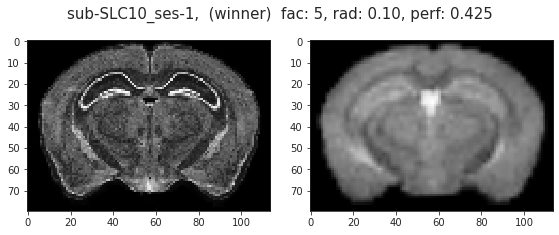

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_09).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC10_ses-1

sub-SLC10_ses-1, perf:
seed                 0
type        ElasticSyN
grad              0.25
syn_bin             32
aff_bin             20
aff_rate           0.8
metric             sym
score         0.976449

registering anat sub-SLC10_ses-2:  93%|█████████████████████▍ | 28/30 [54:38:28<3:55:57, 7078.52s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


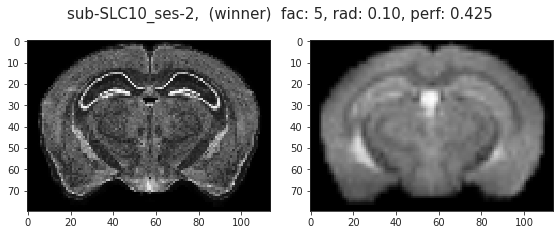

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_09).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC10_ses-2

sub-SLC10_ses-2, perf:
seed                 0
type        ElasticSyN
grad              0.25
syn_bin             32
aff_bin             20
aff_rate           0.8
metric             sym
score         0.949883

registering anat sub-SLC10_ses-3:  97%|██████████████████████▏| 29/30 [56:39:01<1:58:44, 7124.63s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


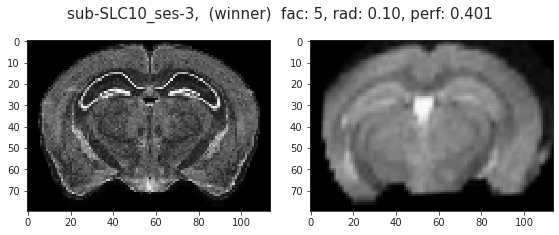

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'perf(2021_10_09).df' saved at
/home/hadi/Documents/Ca-fMRI/processed/transforms/cache/sub-SLC10_ses-3

sub-SLC10_ses-3, perf:
seed               8
type             SyN
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.958984

registering anat sub-SLC10_ses-3: 100%|█████████████████████████| 30/30 [58:37:12<00:00, 7034.42s/it]


overal scores:  0.965 ± 0.013

CPU times: user 45d 21h 10min 21s, sys: 1d 3h 56min 42s, total: 47d 1h 7min 4s
Wall time: 2d 12h 55min 19s


In [6]:
%%time
reg.register_anat(save_results=True, **kwargs)

In [4]:
965 + 13, 965 - 13

(978, 952)

In [4]:
from register.register import *
reg = Register(mice)

In [5]:
reg.register_anat(True)

registering anat sub-SLC10_ses-3: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [16:52<00:00, 33.75s/it]


In [6]:
reg.organize_func()

organizing bold:  sub-SLC01_ses-2_run-1:   3%|▊                      | 7/210 [01:01<31:29,  9.31s/it]/home/hadi/Dropbox/git/_Ca-fMRI/register/register.py:826: RuntimeWarning:

Mean of empty slice.

/home/hadi/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning:

invalid value encountered in true_divide



Warnin! doing sub-SLC01_ses-2_run-1, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-2:   4%|▉                      | 8/210 [01:12<32:32,  9.66s/it]

Warnin! doing sub-SLC01_ses-2_run-2, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-3:   4%|▉                      | 9/210 [01:22<33:16,  9.93s/it]

Warnin! doing sub-SLC01_ses-2_run-3, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-4:   5%|█                     | 10/210 [01:33<33:40, 10.10s/it]

Warnin! doing sub-SLC01_ses-2_run-4, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-5:   5%|█▏                    | 11/210 [01:43<33:47, 10.19s/it]

Warnin! doing sub-SLC01_ses-2_run-5, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-6:   6%|█▎                    | 12/210 [01:53<33:46, 10.23s/it]

Warnin! doing sub-SLC01_ses-2_run-6, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-7:   6%|█▎                    | 13/210 [02:04<33:36, 10.24s/it]

Warnin! doing sub-SLC01_ses-2_run-7, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC04_ses-2_run-1:  33%|███████▎              | 70/210 [13:23<34:26, 14.76s/it]

Warnin! doing sub-SLC04_ses-2_run-1, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-2:  34%|███████▍              | 71/210 [13:37<33:05, 14.28s/it]

Warnin! doing sub-SLC04_ses-2_run-2, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-3:  34%|███████▌              | 72/210 [13:49<31:32, 13.71s/it]

Warnin! doing sub-SLC04_ses-2_run-3, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-4:  35%|███████▋              | 73/210 [14:01<30:13, 13.24s/it]

Warnin! doing sub-SLC04_ses-2_run-4, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-5:  35%|███████▊              | 74/210 [14:14<29:33, 13.04s/it]

Warnin! doing sub-SLC04_ses-2_run-5, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-6:  36%|███████▊              | 75/210 [14:26<28:59, 12.88s/it]

Warnin! doing sub-SLC04_ses-2_run-6, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-7:  36%|███████▉              | 76/210 [14:43<31:23, 14.05s/it]

Warnin! doing sub-SLC04_ses-2_run-7, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC07_ses-3_run-1:  67%|██████████████       | 140/210 [27:08<16:08, 13.83s/it]

Warnin! doing sub-SLC07_ses-3_run-1, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-2:  67%|██████████████       | 141/210 [27:20<15:00, 13.06s/it]

Warnin! doing sub-SLC07_ses-3_run-2, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-3:  68%|██████████████▏      | 142/210 [27:31<14:10, 12.50s/it]

Warnin! doing sub-SLC07_ses-3_run-3, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-4:  68%|██████████████▎      | 143/210 [27:43<13:55, 12.47s/it]

Warnin! doing sub-SLC07_ses-3_run-4, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-5:  69%|██████████████▍      | 144/210 [27:54<13:16, 12.07s/it]

Warnin! doing sub-SLC07_ses-3_run-5, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-6:  69%|██████████████▌      | 145/210 [28:05<12:45, 11.78s/it]

Warnin! doing sub-SLC07_ses-3_run-6, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-7:  70%|██████████████▌      | 146/210 [28:18<12:56, 12.13s/it]

Warnin! doing sub-SLC07_ses-3_run-7, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC08_ses-1_run-1:  70%|██████████████▋      | 147/210 [28:30<12:29, 11.90s/it]

Warnin! doing sub-SLC08_ses-1_run-1, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-2:  70%|██████████████▊      | 148/210 [28:45<13:29, 13.06s/it]

Warnin! doing sub-SLC08_ses-1_run-2, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-3:  71%|██████████████▉      | 149/210 [28:57<12:52, 12.67s/it]

Warnin! doing sub-SLC08_ses-1_run-3, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-4:  71%|███████████████      | 150/210 [29:08<12:12, 12.21s/it]

Warnin! doing sub-SLC08_ses-1_run-4, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-5:  72%|███████████████      | 151/210 [29:21<12:09, 12.36s/it]

Warnin! doing sub-SLC08_ses-1_run-5, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-6:  72%|███████████████▏     | 152/210 [29:33<11:43, 12.14s/it]

Warnin! doing sub-SLC08_ses-1_run-6, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC10_ses-3_run-7: 100%|█████████████████████| 210/210 [41:05<00:00, 11.74s/it]


In [4]:
anat = mice.T1w['sub-SLC01_ses-1']
mask = mice.mask3d['sub-SLC01_ses-1']
func = mice.bold_preproc['sub-SLC01_ses-1_run-5']

In [5]:
xf = func.load_ants()
xf_np = xf.numpy()

In [6]:
xm = mask.load_ants()

In [7]:
xf_np *= np.expand_dims(xm.numpy(), axis=-1)

In [8]:
xf_masked = reset_ants_img(xf_np, xf.spacing, xf.origin, float, use_um=False)

In [9]:
xf_masked

ANTsImage
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (64, 64, 78, 600)
         Spacing    : (0.2, 0.2, 0.2, 1.0)
         Origin     : (6.4, -6.2, -7.8, 0.0)
         Direction  : [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]

In [12]:
ants.image_write(xf_masked, pjoin(tmp_dir, 'subses11_func_masked.nii.gz'))